# Linear Regression
`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the datasat
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

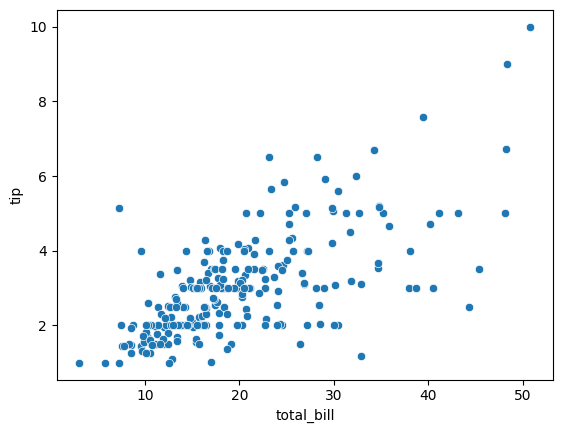

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [4]:
# preprocess the data
scalar = MinMaxScaler()
df[['total_bill', 'tip']] = scalar.fit_transform(df[['total_bill', 'tip']])

In [5]:
# Split the data into X and y
X = df[['total_bill']]
y = df['tip']

In [6]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# call the model
model = LinearRegression()

In [8]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.025935545118580094
[0.57075174]
y =  0.025935545118580094 + [0.57075174] * X


In [10]:
# predict
y_pred = model.predict(X_test)

In [11]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.013064275352519483
R2 =  0.4073649656148878
RMSE =  0.11429906103078662


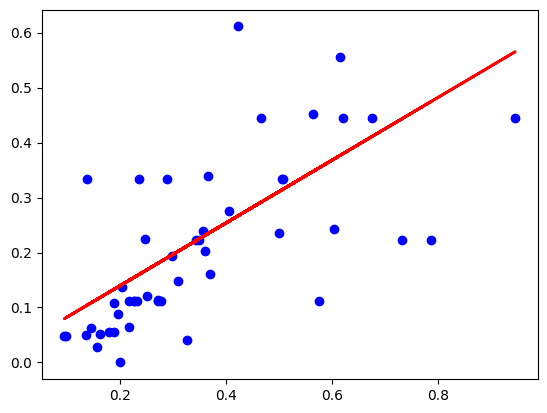

In [12]:
# Plot the model
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()